# Data Cleaning Notebook
This part of the project will 

### Project workflow:
1. We need to load in the various datasets.
2. Explore the various datasets with some EDA
3. Clean the datasets:
    * Clean MVP vote data
    * Clean Player data
4. Combine the MVP and Player datasets
5. Clean the team data
6. Combine all of the datasets. 
7. Explore the dataset furthr with some extra EDA

### Project Goals
I want to make predictions on the 2023 MVP using historical data from the past 20 years. So some key datapoints I'll need are the historical mvp voting breakdowns, statistics from every player in the league, and team performance over the past 20 years. 

In [1]:
# Import needed Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Reading in our data
mvps = pd.read_csv("nbaproject/mvps.csv")

In [6]:
# Explore the mvps dataset
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,...,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
1,1,2,Clyde Drexler,29,POR,12.0,561.0,960,0.584,76,...,6.6,6.7,1.8,0.9,0.470,0.337,0.794,12.8,0.223,1992
2,2,3,David Robinson,26,SAS,2.0,337.0,960,0.351,68,...,12.2,2.7,2.3,4.5,0.551,0.125,0.701,13.9,0.260,1992
3,3,4,Karl Malone,28,UTA,1.0,262.0,960,0.273,81,...,11.2,3.0,1.3,0.6,0.526,0.176,0.778,15.1,0.237,1992
4,4,5,Patrick Ewing,29,NYK,0.0,100.0,960,0.104,82,...,11.2,1.9,1.1,3.0,0.522,0.167,0.738,13.0,0.198,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
462,8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
463,9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
464,10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


## Data Cleaning MVP
We're going to remove the statistical columns because they already lie within the player data. So what we'll do is we'll select a subset of the dataset. 

In [9]:
# Subsetting the dataset
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [10]:
# Checking the output
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1992,900.0,960,0.938
1,Clyde Drexler,1992,561.0,960,0.584
2,David Robinson,1992,337.0,960,0.351
3,Karl Malone,1992,262.0,960,0.273
4,Patrick Ewing,1992,100.0,960,0.104
...,...,...,...,...,...
461,Stephen Curry,2022,4.0,1000,0.004
462,Chris Paul,2022,2.0,1000,0.002
463,DeMar DeRozan,2022,1.0,1000,0.001
464,Kevin Durant,2022,1.0,1000,0.001


## Cleaning the Player Data

### Workflow:
1. First, I'm going to delete unneeded columns.
2. Clean up player name data in the players column so that it can be combined with the MVP dataset.
3. Remove duplicate player names by grouping them on the total column
4. Assign players a team for the most recent team they finished on. 
5. Combine the players data frame with the mvps data frame. 
6. Replace null values for the MVP metrics with 0's.

In [12]:
# Read in the players data
players = pd.read_csv("nbaproject/players.csv")

In [13]:
# Explore the data
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,1,2,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,2,3,Mark Acres,C,29,ORL,68,6,13.6,1.1,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,3,4,Michael Adams,PG,29,WSB,78,78,35.8,6.2,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,4,5,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18421,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
18422,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
18423,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
18424,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [14]:
# Look at completeness of the data
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18426 entries, 0 to 18425
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18426 non-null  int64 
 1   Rk          18426 non-null  object
 2   Player      18426 non-null  object
 3   Pos         18426 non-null  object
 4   Age         18426 non-null  object
 5   Tm          18426 non-null  object
 6   G           18426 non-null  object
 7   GS          18426 non-null  object
 8   MP          18426 non-null  object
 9   FG          18426 non-null  object
 10  FGA         18426 non-null  object
 11  FG%         18321 non-null  object
 12  3P          18426 non-null  object
 13  3PA         18426 non-null  object
 14  3P%         15644 non-null  object
 15  2P          18426 non-null  object
 16  2PA         18426 non-null  object
 17  2P%         18251 non-null  object
 18  eFG%        18321 non-null  object
 19  FT          18426 non-null  object
 20  FTA   

I'm going to remove the first two columns that don't add any value these are `Unname: 0`, `RK`.

In [15]:
# Deleting unnecessary columns
del players["Unnamed: 0"]
del players["Rk"]

In [17]:
# view players
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,10.4,.421,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,Mark Acres,C,29,ORL,68,6,13.6,1.1,2.2,.517,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,Michael Adams,PG,29,WSB,78,78,35.8,6.2,15.8,.393,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,5.7,.433,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992


### Player name clean-up
I want to combine the mvps and players dataframes on names, so I need to make sure everything is in the same format. 


In [18]:
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4         Rafael Addison
5           Mark Aguirre
6            Danny Ainge
7       Victor Alexander
8          Greg Anderson
9         Kenny Anderson
10         Nick Anderson
11          Ron Anderson
12       Willie Anderson
13        Michael Ansley
14        Michael Ansley
15        Michael Ansley
16          Greg Anthony
17        B.J. Armstrong
18         Vincent Askew
19          Keith Askins
20         Stacey Augmon
21          Isaac Austin
22           Miloš Babić
23           John Bagley
24          Thurl Bailey
25          Thurl Bailey
26          Thurl Bailey
27           Steve Bardo
28      Charles Barkley*
29           Dana Barros
30           John Battle
31          Kenny Battle
32          Kenny Battle
33          Kenny Battle
34       William Bedford
35       Benoit Benjamin
36       Winston Bennett
37       Winston Bennett
38       Winston Bennett
39          David Benoit


Looking at some of the names above se can see that there are multiple occurences of names, but there are also asterisks "*" by some names which isn't what we want. This makes an issue for players names when we try and merge the dataframes. Asterisks in this case according to basketball reference means that players were inducted into the Hall of Fame. So let's remove these asterisks.

### Removing asterisks from player names

In [19]:
# Remove asterisks with str.replace method
players["Player"] = players["Player"].str.replace("*", "", regex = False) # set regex to False since the asterisk has a meaning in regular expressions. 


In [20]:
# Observe new results

players.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,10.4,.421,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,Mark Acres,C,29,ORL,68,6,13.6,1.1,2.2,.517,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,Michael Adams,PG,29,WSB,78,78,35.8,6.2,15.8,.393,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,5.7,.433,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992
5,Mark Aguirre,SF,32,DET,75,12,21.1,4.5,10.5,.431,...,0.9,2.3,3.1,1.7,0.7,0.1,1.4,2.3,11.3,1992
6,Danny Ainge,SG,32,POR,81,6,19.7,3.7,8.3,.442,...,0.5,1.3,1.8,2.5,0.9,0.2,0.9,1.8,9.7,1992
7,Victor Alexander,C,22,GSW,80,28,16.9,3.0,5.7,.529,...,1.3,2.9,4.2,0.4,0.6,0.8,1.1,2.2,7.4,1992
8,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
9,Kenny Anderson,PG,21,NJN,64,13,17.0,2.9,7.5,.390,...,0.6,1.4,2.0,3.2,1.0,0.1,1.5,1.1,7.0,1992


It looks like it worked. Charles Barkley and Larry Bird no longer have asterisks by their name. The next step in this notebook is to remove duplicate rows.

### Removing Duplicate Player Rows

I noticed earlier that several players had multiple rows for their names. The reason for this is because of trades. When players get traded they begun to allocate new stats for another team, but there is one all encompassing row in the data for players who have been traded and that's the row for the player where the team value is set to `TOT` which stands for total stats.

In [24]:
# Grouping by player
players.groupby(["Player", "Year"]).get_group(("Winston Bennett", 1992))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
36,Winston Bennett,SF,26,TOT,54,45,15.4,1.5,3.9,.379,...,1.2,1.8,3.0,0.7,0.4,0.2,0.6,2.3,3.6,1992
37,Winston Bennett,SF,26,CLE,52,45,16.0,1.5,4.0,.378,...,1.2,1.9,3.1,0.7,0.4,0.2,0.6,2.3,3.7,1992
38,Winston Bennett,SF,26,MIA,2,0,1.0,0.5,1.0,.500,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,1992


We are going to approach this problem by writing a function that will group by the total accumulated stats for the player over time. 

In [28]:
# Single row function to transform players who have been traded
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]  # When the row `Tm` equal to 'TOT'
        row['Tm'] = df.iloc[-1, :]['Tm']# the team is going to equal the team in the last row
        return row

# Apply the function to each group using the apply method
players = players.groupby(["Player", "Year"]).apply(single_row)  

In [30]:
# Look at the first 20 rows
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1992 174       A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 633       A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 1120      A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 1608      A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 2104      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 2679      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 3266      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 3824      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 4352      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 4871      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 4225   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1992 138     A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 4874     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 5427     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 5934     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 14355   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 10268     A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 10897     A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   
              2012 11481     A.J. Price  PG  25  IND  44   1  12.9  1.3   4.0   
              2013 12073     A.J. Price  PG  26  WAS  57  22  22.4  2.8   7.2   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1992 174    .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 633    .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1120   .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 1608   .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2104   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 2679   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3266   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 3824   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4352   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 4871   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4225   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1992 138    .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 4874   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5427   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 5934   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 14355  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 10268  .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 10897  .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   
              2012 11481  .339  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   
              2013 12073  .390  ...  0.4  1.6  2.0  3.6  0.6  0.1  1.1  1.3   

                           PTS  Year  
Player        Year                    
A.C. Green    1992 174    13.6  1992  
              1993 633    12.8  1993  
              1994 1120   14.7  1994  
              1995 1608   11.2  1995  
              1996 2104    7.5  1996  
              1997 2679    7.2  1997  
              1998 3266    7.3  1998  
              1999 3824    4.9  1999  
              2000 4352    5.0  2000  
              2001 4871    4.5  2001  
A.J. Bramlett 2000 4225    1.0  2000  
A.J.

The call grouped by players and in turn created two more indexes. There's a multi-level index now which is not what we want. We already have a year and name column so we can drop those indexes.

In [31]:
# Dropping multi-level indexes

players.index = players.index.droplevel()

In [32]:
# Dropping multi-level indexes 2nd level

players.index = players.index.droplevel()

In [33]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
174,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
633,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1120,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
1608,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2104,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996


We've removed those indexes and we also have historical data for each player.

## Combining the Player and MVP DF's

I'm going to merge the data frames. I'll use an outer merge because the MVP data only has data for players in the MVP race, but we need the historical data for all players. 

In [34]:
# Merge the dataframes
combined = players.merge(mvps, how = "outer", on = ["Player", "Year"])

In [35]:
# Check the output
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN


The dataset has the 3 columns from the MVP dataset. There is null values for AC Green because he wasn't in the MVP race so he didn't gather any data for these metrics. Let's have a look at people who did receive votes in the `Pts Won` category. 

In [36]:
# Observing MVP candidates
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
192,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
337,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
339,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
340,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
341,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13800,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13801,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13805,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
14165,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


It looks the We can see some familiar names from the dataframe. Allen Iverson had .904 share of the votes for the 2001 MVP race. As we can clearly see [Allen Iverson](https://www.google.com/search?q=2001+nba+mvp&rlz=1C5CHFA_enUS981KR982&oq=2001+NBA+MVP&aqs=chrome.0.0i512l4j0i22i30l6.4121j0j4&sourceid=chrome&ie=UTF-8) won the MVP that season.

### Replace null values in the MVP columns with 0's.
A conundrum we have is that players who have null values will mess up our predictions later when we use machine learning to make predictions. We need to replace null values with 0's since they actually did receive zero votes in the mvp race.

In [40]:
# Replace mvp metrics with 0's to remove null value
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [42]:
# Check our output
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0


## Cleaning Team Dataframe

### Workflow:
1. Read in data
2. Remove unneeded columns
3. Removing header row in the middle of the data.
4. Remove team name asterisks

In [51]:
# Read in teams data

teams = pd.read_csv("nbaproject/teams.csv")

In [52]:
# Check the data
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics*
1,1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks*
2,2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets*
3,3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat*
4,4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers
5,5,25,57,.305,26.0,102.4,106.8,-4.35,1992,Washington Bullets
6,6,21,61,.256,30.0,101.6,108.5,-6.52,1992,Orlando Magic
7,7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1992,Central Division
8,8,67,15,.817,—,109.9,99.5,10.07,1992,Chicago Bulls*
9,9,57,25,.695,10.0,108.9,103.4,5.34,1992,Cleveland Cavaliers*


### Removing the Division row

In [53]:
# Remove division rows
teams = teams[~teams["W"].str.contains("Division")]   # Where teams W column does not contain Division, we want to create a subset of the data

In [54]:
# Check output
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics*
1,1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks*
2,2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets*
3,3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat*
4,4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers
5,5,25,57,.305,26.0,102.4,106.8,-4.35,1992,Washington Bullets
6,6,21,61,.256,30.0,101.6,108.5,-6.52,1992,Orlando Magic
8,8,67,15,.817,—,109.9,99.5,10.07,1992,Chicago Bulls*
9,9,57,25,.695,10.0,108.9,103.4,5.34,1992,Cleveland Cavaliers*
10,10,48,34,.585,19.0,98.9,96.9,2.06,1992,Detroit Pistons*


### Remove team name asterisks
The asterisks tell which team names made the playoffs, but we can already tell that by their record. 

In [55]:
# Replace the asterisk
teams["Team"] = teams["Team"].str.replace("*", "", regex = False)

In [56]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics
1,1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks
2,2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets
3,3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat
4,4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers


### Fixing the team names further

In [57]:
# Lookng at unique team names
teams["Team"].unique()

array(['Boston Celtics', 'New York Knicks', 'New Jersey Nets',
       'Miami Heat', 'Philadelphia 76ers', 'Washington Bullets',
       'Orlando Magic', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Atlanta Hawks',
       'Milwaukee Bucks', 'Charlotte Hornets', 'Utah Jazz',
       'San Antonio Spurs', 'Houston Rockets', 'Denver Nuggets',
       'Dallas Mavericks', 'Minnesota Timberwolves',
       'Portland Trail Blazers', 'Golden State Warriors', 'Phoenix Suns',
       'Seattle SuperSonics', 'Los Angeles Clippers',
       'Los Angeles Lakers', 'Sacramento Kings', 'Toronto Raptors',
       'Vancouver Grizzlies', 'Washington Wizards', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'Boston Celtics\xa0(2)',
       'Philadelphia 76ers\xa0(4)', 'Toronto Raptors\xa0(5)',
       'Brooklyn Nets\xa0(7)', 'New York Knic

In [58]:
# Looking at the combined dataframe
combined["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC', 'CHO',
       'PHI', 'POR', 'DET', 'BOS', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [59]:
# Rewriting the teams csv to a new one to clean the team names columns
teams.to_csv("teams2.csv")

### Fixing the teams csv file
Looking above, there were quite a few team names that were in the wrong format. I downloaded the CSV file and tried to get them in a uniform naming format for the merge later on. I used OpenRefine to do this part of the cleaning. Next, I will upload the file and make sure it has the same amount of rows as before. 

In [60]:
# Read in teams_updated file
teams_updated = pd.read_csv("teams_updated.csv")
teams_updated

,Column,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,0,51,31,0.622,—,106.6,103.0,3.41,1992,Boston Celtics
1,1,1,51,31,0.622,—,101.6,97.7,3.67,1992,New York Knicks
2,2,2,40,42,0.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets
3,3,3,38,44,0.463,13.0,105.0,109.2,-3.94,1992,Miami Heat
4,4,4,35,47,0.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers
...,...,...,...,...,...,...,...,...,...,...,...
904,1033,13,56,26,0.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies
905,1034,14,52,30,0.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks
906,1035,15,36,46,0.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans
907,1036,16,34,48,0.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [61]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics
1,1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks
2,2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets
3,3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat
4,4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers
...,...,...,...,...,...,...,...,...,...,...
1033,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies (2)
1034,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks (4)
1035,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans (9)
1036,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs (10)


It looks like the teams columns are equal still. No data was lost while I worked in OpenRefine. 

## Combining the teams and combined files
We need to combined them on team names and as such we will have to read in a linking CSV called nicknames.csv

In [64]:
# Read in nicknames file
nicknames = {}

with open("nbaproject/nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:  # skip the header row
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [65]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [67]:
# Create a full team name column in the combined dataframe
combined["Team"] = combined["Tm"].map(nicknames)

In [68]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns


In [72]:
stats = combined.merge(teams_updated, how = "outer", on = ["Team", "Year"])

In [73]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team,Column,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,Los Angeles Lakers,28,13,43,39,0.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,.458,...,Los Angeles Lakers,28,13,43,39,0.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,.469,...,Los Angeles Lakers,28,13,43,39,0.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,.407,...,Los Angeles Lakers,28,13,43,39,0.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,.222,...,Los Angeles Lakers,28,13,43,39,0.524,14.0,100.4,101.5,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,Milwaukee Bucks,835,7,42,40,0.512,9.0,103.6,103.8,-0.45
14308,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,Milwaukee Bucks,835,7,42,40,0.512,9.0,103.6,103.8,-0.45
14309,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,Milwaukee Bucks,835,7,42,40,0.512,9.0,103.6,103.8,-0.45
14310,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,Milwaukee Bucks,835,7,42,40,0.512,9.0,103.6,103.8,-0.45


In [74]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14308,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14309,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14310,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


It looks like the merge went well. Stats did have a couple of unnecessary columns that we will need to drop. 

In [75]:
# Drop unnecessary columns
del stats["Unnamed: 0"]

In [76]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Column,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.0,Los Angeles Lakers,28,43,39,0.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,.458,...,0.0,Los Angeles Lakers,28,43,39,0.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,.469,...,0.0,Los Angeles Lakers,28,43,39,0.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,.407,...,0.0,Los Angeles Lakers,28,43,39,0.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,.222,...,0.0,Los Angeles Lakers,28,43,39,0.524,14.0,100.4,101.5,-0.95


In [77]:
# Drop unnecessary columns
del stats["Column"]

In [78]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,.458,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,.469,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,.407,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,.222,...,0.0,0.0,Los Angeles Lakers,43,39,0.524,14.0,100.4,101.5,-0.95


## Correcting Data Types
I noticed earlier when I used the info method that a lot of our data types were in the wrong format. For example, numerical types like MP are in object format. I'm going to visualize the different data types below and we'll fix this after. 

In [79]:
# Looking stats data types
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14311
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14312 non-null  object 
 1   Pos      14312 non-null  object 
 2   Age      14312 non-null  object 
 3   Tm       14312 non-null  object 
 4   G        14312 non-null  object 
 5   GS       14312 non-null  object 
 6   MP       14312 non-null  object 
 7   FG       14312 non-null  object 
 8   FGA      14312 non-null  object 
 9   FG%      14254 non-null  object 
 10  3P       14312 non-null  object 
 11  3PA      14312 non-null  object 
 12  3P%      12284 non-null  object 
 13  2P       14312 non-null  object 
 14  2PA      14312 non-null  object 
 15  2P%      14213 non-null  object 
 16  eFG%     14254 non-null  object 
 17  FT       14312 non-null  object 
 18  FTA      14312 non-null  object 
 19  FT%      13796 non-null  object 
 20  ORB      14312 non-null  object 
 21  DRB      143

As we can see there are a lot of statistical categories that are in the wrong data type format. This is an issue because we'll be using a machine learning algorithm later in to make predictions and machine learning algorithms work best when the data columns are in a numerical format. 

In [80]:
# Setting numerical columns to numerical data types. 
stats = stats.apply(pd.to_numeric, errors = "ignore")

In [82]:
# checking new outputs
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14311
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14312 non-null  object 
 1   Pos      14312 non-null  object 
 2   Age      14312 non-null  int64  
 3   Tm       14312 non-null  object 
 4   G        14312 non-null  int64  
 5   GS       14312 non-null  int64  
 6   MP       14312 non-null  float64
 7   FG       14312 non-null  float64
 8   FGA      14312 non-null  float64
 9   FG%      14254 non-null  float64
 10  3P       14312 non-null  float64
 11  3PA      14312 non-null  float64
 12  3P%      12284 non-null  float64
 13  2P       14312 non-null  float64
 14  2PA      14312 non-null  float64
 15  2P%      14213 non-null  float64
 16  eFG%     14254 non-null  float64
 17  FT       14312 non-null  float64
 18  FTA      14312 non-null  float64
 19  FT%      13796 non-null  float64
 20  ORB      14312 non-null  float64
 21  DRB      143

I can see that GB standing for games behind is still in an object format. However, being familiar with basketball and standings tables I know that this is a numeric column. I'll have to convert this column to a numerical column manually. 

In [83]:
# Look at the GB columns unique values
stats["GB"].unique()

array(['14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0', '24.0',
       '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

We can see that there is a dash which will make which means that a team is zero games back. Meaning they are leading the other teams in record. I'll replace this with 0.

In [84]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [85]:
# Check the output
stats["GB"].unique()

array(['14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0', '24.0',
       '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [86]:
# Convert "GB" column to numeric
stats["GB"] = pd.to_numeric(stats["GB"])

In [87]:
# Check the conversion
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14312 entries, 0 to 14311
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14312 non-null  object 
 1   Pos      14312 non-null  object 
 2   Age      14312 non-null  int64  
 3   Tm       14312 non-null  object 
 4   G        14312 non-null  int64  
 5   GS       14312 non-null  int64  
 6   MP       14312 non-null  float64
 7   FG       14312 non-null  float64
 8   FGA      14312 non-null  float64
 9   FG%      14254 non-null  float64
 10  3P       14312 non-null  float64
 11  3PA      14312 non-null  float64
 12  3P%      12284 non-null  float64
 13  2P       14312 non-null  float64
 14  2PA      14312 non-null  float64
 15  2P%      14213 non-null  float64
 16  eFG%     14254 non-null  float64
 17  FT       14312 non-null  float64
 18  FTA      14312 non-null  float64
 19  FT%      13796 non-null  float64
 20  ORB      14312 non-null  float64
 21  DRB      143

It looks like it worked. 

## Write our data to a csv

In [88]:
stats.to_csv("player_mvp_stats.csv")

## Explore the new file
Next, we're going to explore the data further to make sure that it is in a format suitable for machine learning. I'll be looking for null values, anomalies in the dataset, and make sure there is no other hiccups. I'll do this through data visualization and I'll also identify some highly correlated variables. One thing that needs to come under consideration is that we want to create a variable for a player that plays more than 60 games. These days load management is pretty popular. Load management is limiting the number of games a player plays consecutively in an effort to avoid injuries. I want gather data on players who are playing enough games to contribute to their team. I'll go based off the rule criteria that a player needs to play at least 70% of a team's games.

[League Leaders Qualifications](https://www.nba.com/stats/help/statminimums/)

70% of 82 is 58 games. 

In [102]:
# Create a new feature called highest scoring to make sure that we have qualified players
highest_scoring = stats[stats["G"] > 58].sort_values("PTS", ascending = False).head(10)

In [103]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9861,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1072,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
9878,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,1010.0,0.363,Houston Rockets,44,28,0.611,0.0,117.8,114.8,3.13
4546,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
10153,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
7026,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6470,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
3749,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,1010.0,0.449,Golden State Warriors,39,33,0.542,12.0,113.7,112.7,1.10
6522,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
1086,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24


<AxesSubplot:xlabel='Player'>

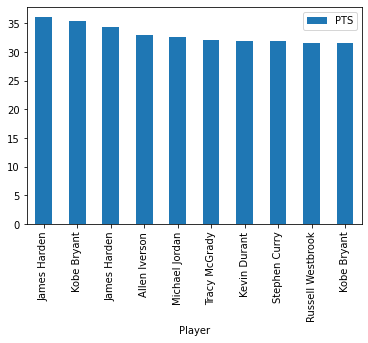

In [104]:
# Visualize this variable
highest_scoring.plot.bar("Player", "PTS")

We can see from the basic plot above that James Harden has some of the more prolific scoring seasons of all-time. 

In [105]:
# Look at highest scoring player for each year
stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1992,10140,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,10153,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,8874,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7474,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10704,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10718,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10732,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,958,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56
2000,131,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,1210.0,0.998,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41


This shows us the leading scorer for the past 20 years. I'm going to do the same for some defensive leaders because in addition to NBA MVP, I also want to pick the NBA DPOY for next year, if possible. I won't use machine learning on the second prediction as I would have to scrape more data on the NBA DPOY, but I want to make some predictions based on statistics like BLKS, STLS, etc. 

In [106]:
# Look at highest steals player for each year
stats.groupby("Year").apply(lambda x: x.sort_values("STL", ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1992,10979,John Stockton,PG,29,UTA,82,82,36.6,5.5,11.5,0.482,...,960.0,0.019,Utah Jazz,55,27,0.671,0.0,108.3,101.9,5.70
1993,10153,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,4942,Nate McMillan,PG,29,SEA,73,8,25.8,2.4,5.4,0.447,...,0.0,0.000,Seattle SuperSonics,63,19,0.768,0.0,105.9,96.9,8.68
1995,10187,Scottie Pippen,SF,29,CHI,79,79,38.2,8.0,16.7,0.480,...,1050.0,0.079,Chicago Bulls,47,35,0.573,5.0,101.5,96.7,4.32
1996,14104,Gary Payton,PG,27,SEA,81,81,39.0,7.6,15.8,0.484,...,1130.0,0.087,Seattle SuperSonics,64,18,0.780,0.0,104.5,96.7,7.40
1997,3214,Mookie Blaylock,PG,29,ATL,78,78,39.2,6.4,14.9,0.432,...,0.0,0.000,Atlanta Hawks,56,26,0.683,13.0,94.8,89.4,5.52
1998,3231,Mookie Blaylock,PG,30,ATL,70,69,38.6,5.3,13.4,0.392,...,0.0,0.000,Atlanta Hawks,50,32,0.610,12.0,95.9,92.3,3.85
1999,13350,Kendall Gill,SF,30,NJN,50,47,32.1,4.7,11.9,0.398,...,0.0,0.000,New Jersey Nets,16,34,0.320,17.0,91.4,95.2,-3.20
2000,8472,Eddie Jones,SG,28,CHH,72,72,39.0,6.6,15.5,0.427,...,0.0,0.000,Charlotte Hornets,49,33,0.598,7.0,98.4,95.8,2.33


In [107]:
# Look at highest scoring player for each year
stats.groupby("Year").apply(lambda x: x.sort_values("BLK", ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1992,8842,David Robinson,C,26,SAS,68,68,37.7,8.7,15.8,0.551,...,960.0,0.351,San Antonio Spurs,47,35,0.573,8.0,104.0,100.6,2.81
1993,12896,Hakeem Olajuwon,C,30,HOU,82,82,39.5,10.3,19.5,0.529,...,980.0,0.660,Houston Rockets,55,27,0.671,0.0,104.0,99.8,3.57
1994,2011,Dikembe Mutombo,C,27,DEN,82,82,34.8,4.5,7.8,0.569,...,0.0,0.000,Denver Nuggets,42,40,0.512,16.0,100.3,98.8,1.54
1995,10880,Dikembe Mutombo,C,28,DEN,82,82,37.8,4.3,7.7,0.556,...,0.0,0.000,Denver Nuggets,41,41,0.500,21.0,101.3,100.5,0.96
1996,9324,Dikembe Mutombo,C,29,DEN,74,74,36.7,3.8,7.7,0.499,...,0.0,0.000,Denver Nuggets,35,47,0.427,24.0,97.7,100.4,-2.62
1997,87,Shawn Bradley,C,24,DAL,73,70,31.3,5.6,12.4,0.449,...,0.0,0.000,Dallas Mavericks,24,58,0.293,40.0,90.6,97.0,-6.47
1998,5141,Marcus Camby,C,23,TOR,63,58,31.8,4.9,11.9,0.412,...,0.0,0.000,Toronto Raptors,16,66,0.195,46.0,94.9,104.2,-8.33
1999,4822,Alonzo Mourning,C,28,MIA,46,46,38.1,7.0,13.8,0.511,...,1180.0,0.655,Miami Heat,33,17,0.660,0.0,89.0,84.0,5.11
2000,4839,Alonzo Mourning,C,29,MIA,79,78,34.8,8.3,15.0,0.551,...,1210.0,0.303,Miami Heat,52,30,0.634,0.0,94.4,91.3,2.75


In [109]:
# Create a new feature called highest blocking to make sure that we have qualified players
highest_blocking = stats[stats["G"] > 58].sort_values("BLK", ascending = False).head(10)

In [110]:
highest_blocking

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
8842,David Robinson,C,26,SAS,68,68,37.7,8.7,15.8,0.551,...,960.0,0.351,San Antonio Spurs,47,35,0.573,8.0,104.0,100.6,2.81
9324,Dikembe Mutombo,C,29,DEN,74,74,36.7,3.8,7.7,0.499,...,0.0,0.000,Denver Nuggets,35,47,0.427,24.0,97.7,100.4,-2.62
9998,Hakeem Olajuwon,C,29,HOU,70,69,37.7,8.4,16.8,0.502,...,0.0,0.000,Houston Rockets,42,40,0.512,13.0,102.0,103.7,-1.94
12896,Hakeem Olajuwon,C,30,HOU,82,82,39.5,10.3,19.5,0.529,...,980.0,0.660,Houston Rockets,55,27,0.671,0.0,104.0,99.8,3.57
2011,Dikembe Mutombo,C,27,DEN,82,82,34.8,4.5,7.8,0.569,...,0.0,0.000,Denver Nuggets,42,40,0.512,16.0,100.3,98.8,1.54
10880,Dikembe Mutombo,C,28,DEN,82,82,37.8,4.3,7.7,0.556,...,0.0,0.000,Denver Nuggets,41,41,0.500,21.0,101.3,100.5,0.96
5141,Marcus Camby,C,23,TOR,63,58,31.8,4.9,11.9,0.412,...,0.0,0.000,Toronto Raptors,16,66,0.195,46.0,94.9,104.2,-8.33
13682,Serge Ibaka,PF,22,OKC,66,66,27.2,4.0,7.4,0.535,...,0.0,0.000,Oklahoma City Thunder,47,19,0.712,0.0,103.1,96.9,6.44
12912,Hakeem Olajuwon,C,31,HOU,80,80,41.0,11.2,21.2,0.528,...,1010.0,0.880,Houston Rockets,58,24,0.707,0.0,101.1,96.8,4.19
4839,Alonzo Mourning,C,29,MIA,79,78,34.8,8.3,15.0,0.551,...,1210.0,0.303,Miami Heat,52,30,0.634,0.0,94.4,91.3,2.75


<AxesSubplot:xlabel='Player'>

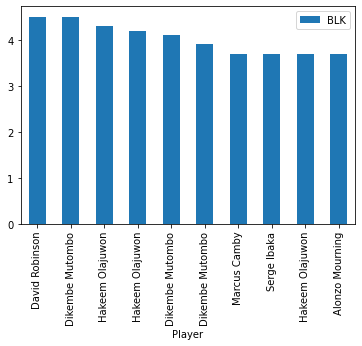

In [111]:
# Visualize this variable
highest_blocking.plot.bar("Player", "BLK")

In [112]:
# Create a new feature called highest stealing to make sure that we have qualified players
highest_stealing = stats[stats["G"] > 58].sort_values("STL", ascending = False).head(10)

In [113]:
highest_stealing

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
10979,John Stockton,PG,29,UTA,82,82,36.6,5.5,11.5,0.482,...,960.0,0.019,Utah Jazz,55,27,0.671,0.0,108.3,101.9,5.70
4942,Nate McMillan,PG,29,SEA,73,8,25.8,2.4,5.4,0.447,...,0.0,0.000,Seattle SuperSonics,63,19,0.768,0.0,105.9,96.9,8.68
14104,Gary Payton,PG,27,SEA,81,81,39.0,7.6,15.8,0.484,...,1130.0,0.087,Seattle SuperSonics,64,18,0.780,0.0,104.5,96.7,7.40
7690,Larry Hughes,SG,26,WAS,61,61,38.7,7.7,17.8,0.430,...,0.0,0.000,Washington Wizards,45,37,0.549,14.0,100.5,100.8,-0.71
10187,Scottie Pippen,SF,29,CHI,79,79,38.2,8.0,16.7,0.480,...,1050.0,0.079,Chicago Bulls,47,35,0.573,5.0,101.5,96.7,4.32
13579,Micheal Williams,PG,25,IND,79,76,34.8,5.1,10.4,0.490,...,0.0,0.000,Indiana Pacers,40,42,0.488,27.0,112.2,110.3,1.85
10172,Scottie Pippen,SF,28,CHI,72,72,38.3,8.7,17.8,0.491,...,1010.0,0.386,Chicago Bulls,55,27,0.671,2.0,98.0,94.9,2.87
1005,Allen Iverson,SG,26,PHI,60,59,43.7,11.1,27.8,0.398,...,1260.0,0.023,Philadelphia 76ers,43,39,0.524,9.0,91.0,89.4,1.27
10153,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
9145,Chris Paul,PG,23,NOH,78,78,38.5,8.1,16.1,0.503,...,1210.0,0.159,New Orleans Hornets,49,33,0.598,5.0,95.8,94.3,1.41


<AxesSubplot:xlabel='Player'>

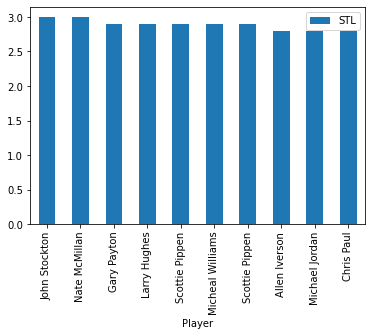

In [114]:
# Visualize this variable
highest_stealing.plot.bar("Player", "STL")

Ironically, it looks like the stats for most steals and most blocks don't provide much value in the way of predicting Defensive Players of the Year. I'll have to address this next time. 

<AxesSubplot:xlabel='Year'>

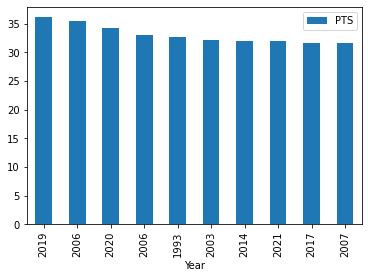

In [116]:
# Plotting the highest scorer by year
highest_scoring.plot.bar("Year", "PTS")

## Checking Correlations
I'm going to be using this data for machine learning so I want to see which values are highly correlated and choose what will provide the most value in making predictions. 

In [118]:
# Import seaborn to create correlation matrixes
import seaborn as sns

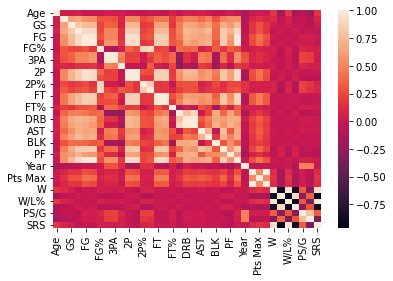

In [122]:
#Heatmap of Stats Dataset
_ = sns.heatmap(stats.corr())

I can't really see the correlations with share in this heatmap so I'll list them below. 

In [123]:
# Look at correlation as they relate to share
stats.corr()["Share"]

Age        0.018294
G          0.089028
GS         0.166831
MP         0.160586
FG         0.275522
FGA        0.247992
FG%        0.064244
3P         0.094153
3PA        0.094155
3P%        0.013070
2P         0.277003
2PA        0.252902
2P%        0.059888
eFG%       0.056946
FT         0.316608
FTA        0.322260
FT%        0.036215
ORB        0.101943
DRB        0.216937
TRB        0.189422
AST        0.199827
STL        0.171522
BLK        0.154291
TOV        0.233367
PF         0.072672
PTS        0.286891
Year      -0.008753
Pts Won    0.995295
Pts Max    0.523574
Share      1.000000
W          0.120320
L         -0.119767
W/L%       0.124265
GB        -0.099313
PS/G       0.042161
PA/G      -0.038747
SRS        0.119524
Name: Share, dtype: float64

It looks like there are several categories that correlate well with Share of the votes. Some notable columns are 
- GS (games started)
- FG (field goals made). Field goals obviously correlates heavily because PTS heavily heavily and is a great indicator of where a player stands in the MVP race. 
- PTS
- The MVP vote categories also correlate quite a bit because they directly are involved in the share calculation.
- W and L have a statistically significant correlation as well. 

In [ ]:
# Plot the results
stats.corr()["Share"].plot